## Import Library

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("D:/")

## Data Collection 

In [4]:
# load the data into pandas dataframe
df=pd.read_csv("Train.csv")

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
# show basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size 
- Outlet_Location_Type
- Outlet_Type

In [6]:
# statistical measure of dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# number of row and column
df.shape

(8523, 12)

In [8]:
# check null value of dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df=df.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

### Replace the missing value in "Item Weight" with mean

In [8]:
mean=df["Item_Weight"].mean()

In [9]:
df["Item_Weight"]=df["Item_Weight"].fillna(mean)

### Replace the missing value in "Outlet Size" with mode

In [10]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)

In [12]:
# check missing value
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
# check basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


## Data Analysis

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical Features

Text(0.5, 1.0, 'Distribution of Item Weight')

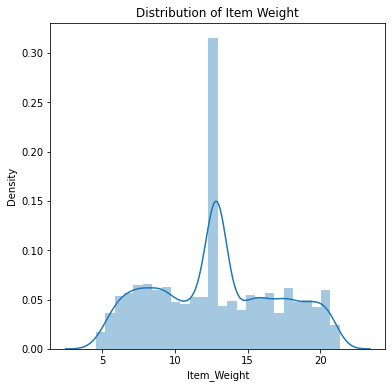

In [21]:
# distribution plot of item weight
plt.figure(figsize=(6,6))
sns.distplot(df["Item_Weight"])
plt.title("Distribution of Item Weight")

Text(0.5, 1.0, 'Distribution of Item_Visibility')

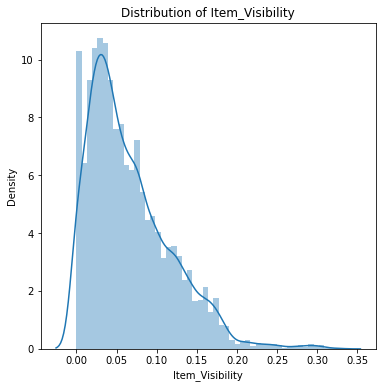

In [22]:
# distribution plot of Item_Visibility 
plt.figure(figsize=(6,6))
sns.distplot(df["Item_Visibility"])
plt.title("Distribution of Item_Visibility")

Text(0.5, 1.0, 'Distribution of Item_MRP')

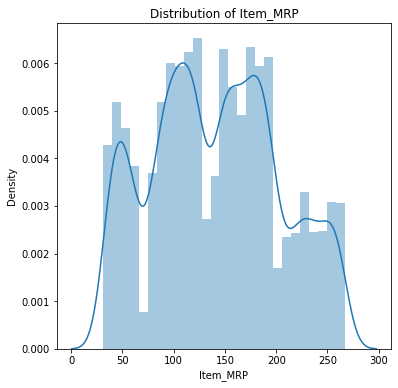

In [23]:
# distribution plot of Item_MRP 
plt.figure(figsize=(6,6))
sns.distplot(df["Item_MRP"])
plt.title("Distribution of Item_MRP")

Text(0.5, 1.0, 'Distribution of Item_Outlet_Sales')

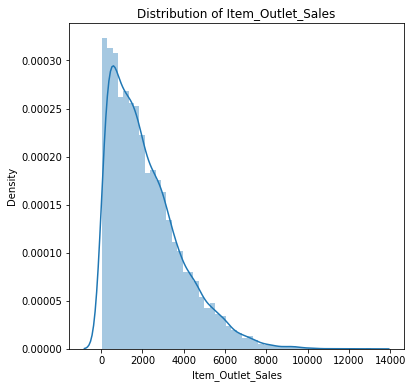

In [24]:
# distribution plot of Item_Outlet_Sales 
plt.figure(figsize=(6,6))
sns.distplot(df["Item_Outlet_Sales"])
plt.title("Distribution of Item_Outlet_Sales")

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


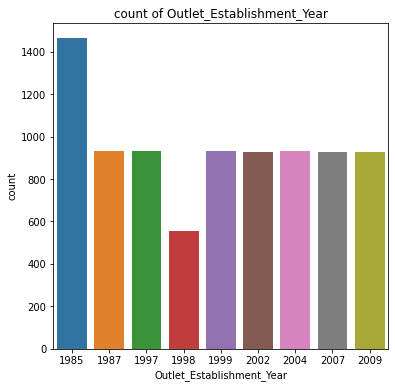

In [25]:
# countplot of Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(df["Outlet_Establishment_Year"])
plt.title("count of Outlet_Establishment_Year")
print(df["Outlet_Establishment_Year"].value_counts())

### Categorical Feature

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


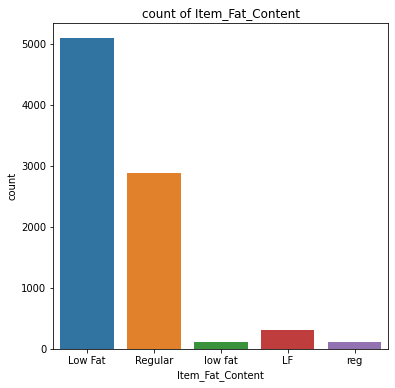

In [26]:
# countplot of Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(df["Item_Fat_Content"])
plt.title("count of Item_Fat_Content")
print(df["Item_Fat_Content"].value_counts())

Text(0.5, 1.0, 'count of Item_Type')

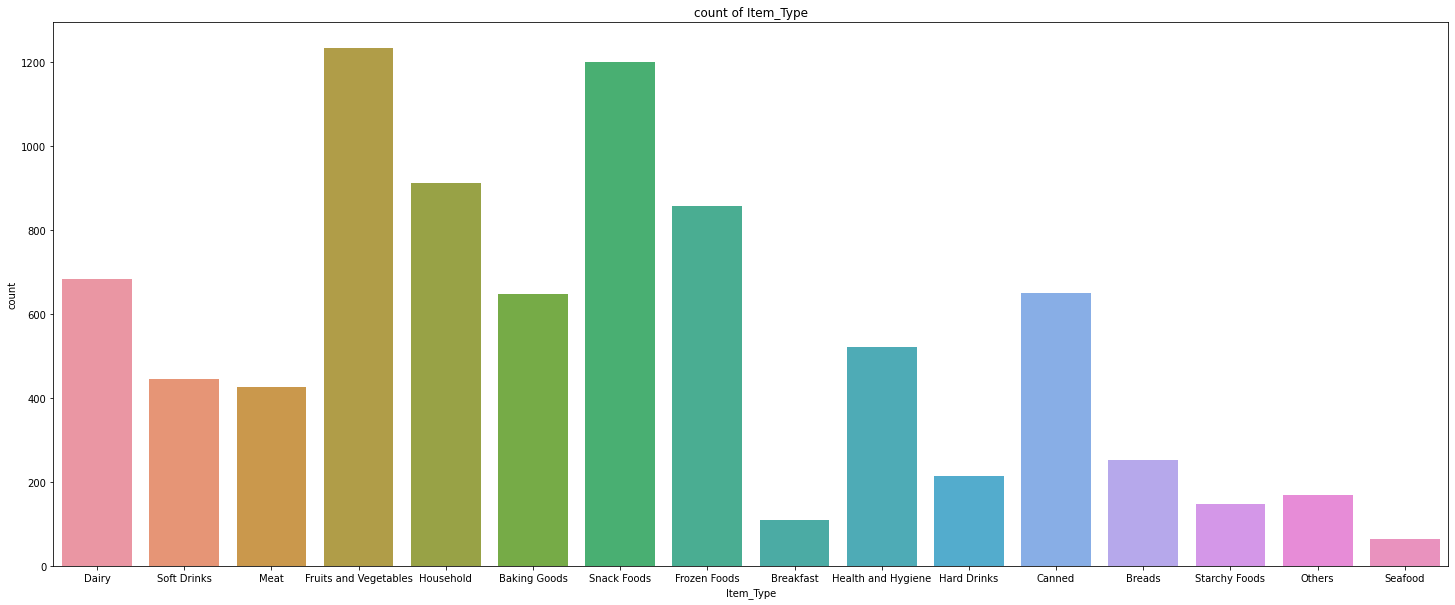

In [27]:
# countplot of Item_Type
plt.figure(figsize=(25,10))
sns.countplot(df["Item_Type"])
plt.title("count of Item_Type")

Text(0.5, 1.0, "count of 'Outlet_Size'")

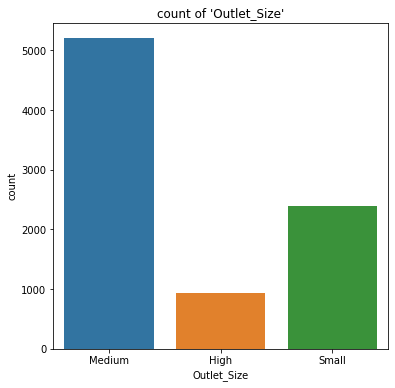

In [28]:
# countplot of 'Outlet_Size'
plt.figure(figsize=(6,6))
sns.countplot(df["Outlet_Size"])
plt.title("count of 'Outlet_Size'")

In [15]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Data Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [30]:
# import labelEncoder library
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

In [31]:
new_df=df.apply(LabelEncoder().fit_transform)

In [32]:
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,1,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7175,13,1857,8,1,2,2,1466


In [21]:
new_df=pd.get_dummies(new_df,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"])

In [22]:
new_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Fat_Content_3',
       'Item_Fat_Content_4', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [23]:
new_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,4,5592,4,2540,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,57,880,14,473,8,422,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,376,715,10,2901,4,1639,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,6,4227,3,670,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,265,0,9,627,1,865,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3912,13,4955,1,2047,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,233,3278,0,2023,5,516,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,299,2302,8,1263,6,1018,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,149,7175,13,1857,8,1466,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [24]:
# separate the label and target data
x=new_df.drop(["Item_Outlet_Sales"],axis=1)
y=new_df.Item_Outlet_Sales

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 20) (6818, 20) (1705, 20)


In [28]:
x.describe()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,298.756776,3709.198639,7.226681,2941.096562,3.790684,0.037076,0.597090,0.338965,0.013141,0.013728,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,95.451067,2396.606857,4.209990,1675.483234,2.730322,0.188960,0.490512,0.473386,0.113885,0.116365,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1595.500000,4.000000,1535.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,326.000000,3708.000000,6.000000,2949.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,361.000000,5789.500000,10.000000,4351.500000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,415.000000,7879.000000,15.000000,5937.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# import StandardScaler library
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [34]:
x_train_std=std.fit_transform(x_train)

In [35]:
x_test_std=std.transform(x_test)

In [36]:
x_train_std

array([[ 1.00439018,  0.96533577, -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.23760194,  0.19186569,  1.60759199, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.01496562,  0.29157407,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.23238346, -1.19862827,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.09545501,  1.29992208, -1.70489982, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.62367454,  1.53980627,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [37]:
x_test_std

array([[ 0.06317651,  0.04042575,  0.18795264, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 0.86690953, -0.4451833 ,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.15299846,  0.48515019, -1.46829326, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.61309911,  1.08506928,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 0.77173062, -1.55115374,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-2.33744713, -1.47230485,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513]])

## Show Best Accuracy using for loop

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [39]:
lists=[LinearRegression,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor]

In [40]:
for i in lists:
    reg=i()
    model=reg.fit(x_train_std,y_train)
    y_train_pred=reg.predict(x_train_std)
    y_test_pred=reg.predict(x_test_std)
    print(i,"R2 Score on Train Data",r2_score(y_train,y_train_pred))
    print(i,"R2 Score on Test Data",r2_score(y_test,y_test_pred))
    print("----------------------------------------")

<class 'sklearn.linear_model._base.LinearRegression'> R2 Score on Train Data 0.637226591454271
<class 'sklearn.linear_model._base.LinearRegression'> R2 Score on Test Data 0.6240409185559989
----------------------------------------
<class 'sklearn.svm._classes.SVR'> R2 Score on Train Data 0.17097087477843997
<class 'sklearn.svm._classes.SVR'> R2 Score on Test Data 0.1780268880271485
----------------------------------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> R2 Score on Train Data 0.7208984921950389
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> R2 Score on Test Data 0.5697537265533386
----------------------------------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> R2 Score on Train Data 1.0
<class 'sklearn.tree._classes.DecisionTreeRegressor'> R2 Score on Test Data 0.29637038937492166
----------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'> R2 Score on Train Data 0.947270334054066
<class 'sklear

## Here we see LinearRegression gives us best score so we can use           LinearRegression algorithm

In [41]:
model=LinearRegression()

In [43]:
model.fit(x_train_std,y_train)

LinearRegression()

In [44]:
y_train_pred=model.predict(x_train_std)
r2_score(y_train,y_train_pred)

0.637226591454271

In [45]:
y_test_pred=model.predict(x_test_std)
r2_score(y_test,y_test_pred)

0.6240409185559989

## compare y_test and y_pred value using distplot

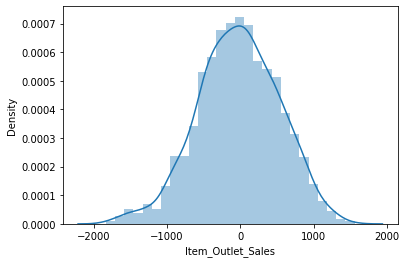

In [50]:
sns.distplot(y_test-y_test_pred)
plt.show()

## compare y_test and y_pred value using Scatter plot

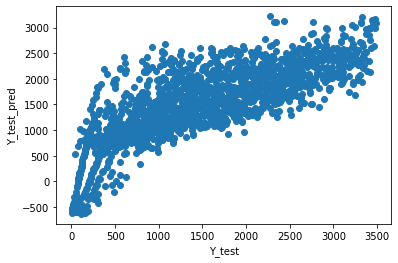

In [51]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.show()

## Model Evaluation

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
print("R2 Score:",r2_score(y_test,y_test_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_test_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R2 Score: 0.6240409185559989
Mean Absolute Error: 445.98615760166143
Root Mean Squared Error: 557.9764723854103


## Here we are predict real time data they have label columns and not a target column.
## Now predict a target column

In [54]:
# Load the real time data
x_test=pd.read_csv("Test.csv")

In [55]:
# show first 5 rows of dataset
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [56]:
# show basic information of dataset
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [57]:
# check null value of dataset
x_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Model building before we are using this step then also doing same step here.

In [58]:
x=x_test.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

In [59]:
x["Item_Weight"]=x["Item_Weight"].fillna(x["Item_Weight"].mean())

In [60]:
x["Outlet_Size"]=x["Outlet_Size"].fillna(x["Outlet_Size"].mode()[0])

In [61]:
x.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [62]:
x=x.apply(LabelEncoder().fit_transform)

In [63]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,404,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,338,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,319,2,4423,4,3972,0,1,2,3


In [64]:
x=pd.get_dummies(x,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"])

In [65]:
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,404,66,13,1460,4,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,223,1714,4,965,7,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,338,4042,11,4076,3,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3,156,388,13,2522,7,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,319,4423,4,3972,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [66]:
x_test1=std.transform(x)

In [67]:
x_test1

array([[ 1.11014453, -1.52361921,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.80400912, -0.83609024, -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.41216585,  0.13512786,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       ...,
       [-0.11660588, -0.19278341,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.52849563, -1.55115374, -0.99508015, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.16948305,  0.18602503, -0.99508015, ...,  0.73160085,
        -0.34892775, -0.35759513]])

### Here we are predict the real time data with using the model.

In [71]:
pred=model.predict(x_test1)

In [72]:
pred

array([1192.50677691, 1032.56927691,  658.06927691, ..., 1199.25677691,
       1952.25677691,  925.25677691])

## Export the excel file with target column and also handling the missing value.

In [73]:
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [74]:
x_test["Item_Weight"]=x_test["Item_Weight"].fillna(x_test["Item_Weight"].mean())

In [75]:
x_test["Outlet_Size"]=x_test["Outlet_Size"].fillna(x_test["Outlet_Size"].mode()[0])

In [76]:
x_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [77]:
# real data join the target column
x_test["Item_Outlet_Sales"]=pred

In [78]:
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1192.506777
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1032.569277
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,658.069277
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,1546.256777
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,2610.038027


In [116]:
x_test.to_excel("D:\\x test prediction.xlsx")